In [2]:
pwd

'C:\\Users\\sharlin.kahlon'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
#Loading Dataset
df= pd.read_csv("SKDataset-finalProject.csv", sep=",")
df.head()

,id,Issue_Date,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment,Region
0,643218,01-12-2010,7.0,MORTGAGE,45000,20000.0,60 months,debt_consolidation,Low,Good Loan,9.99,13.36,24421.720000,20000.00,424.85,ulster
1,642872,01-12-2010,0.5,OWN,145000,7475.0,60 months,debt_consolidation,High,Good Loan,13.72,17.39,10370.742730,7475.00,172.85,leinster
2,642861,01-12-2010,0.5,MORTGAGE,120000,5575.0,36 months,small_business,High,Good Loan,15.20,16.40,6819.090000,5574.99,193.81,Northern-Irl
3,642859,01-12-2010,0.5,RENT,120000,2150.0,60 months,debt_consolidation,High,Good Loan,14.83,6.16,2816.830000,2150.00,50.96,Northern-Irl
4,642857,01-12-2010,0.5,MORTGAGE,140000,7050.0,60 months,moving,Low,Good Loan,12.98,4.26,9619.300001,7050.00,160.34,ulster


In [4]:
df.shape

(74181, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74181 entries, 0 to 74180
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 74181 non-null  int64  
 1   Issue_Date         74181 non-null  object 
 2   Emp_Length_Int     74181 non-null  float64
 3   Home_Ownership     74131 non-null  object 
 4   Annual_Income      74181 non-null  int64  
 5   Loan_Amount        74161 non-null  float64
 6   Term               74181 non-null  object 
 7   Purpose            74181 non-null  object 
 8   Interest_Payments  74181 non-null  object 
 9   Loan_Status        74181 non-null  object 
 10  Interest_Rate      74181 non-null  float64
 11  DTI                74181 non-null  float64
 12  Total_Payment      74181 non-null  float64
 13  Total_Rec_Prncp    74181 non-null  float64
 14  Installment        74181 non-null  float64
 15  Region             74169 non-null  object 
dtypes: float64(7), int64(2

In [6]:
df.isnull().sum()

id                    0
Issue_Date            0
Emp_Length_Int        0
Home_Ownership       50
Annual_Income         0
Loan_Amount          20
Term                  0
Purpose               0
Interest_Payments     0
Loan_Status           0
Interest_Rate         0
DTI                   0
Total_Payment         0
Total_Rec_Prncp       0
Installment           0
Region               12
dtype: int64

Missing Values are removed using mean and mode. 

In [7]:
#Missing Values for numerical
df['Loan_Amount']= df['Loan_Amount'].fillna(df['Loan_Amount'].mean())

In [8]:
#for categorical
df['Region']= df['Region'].fillna(df['Region'].mode()[0])
df['Home_Ownership']= df['Home_Ownership'].fillna(df['Home_Ownership'].mode()[0])

In [9]:
df.isnull().sum()

id                   0
Issue_Date           0
Emp_Length_Int       0
Home_Ownership       0
Annual_Income        0
Loan_Amount          0
Term                 0
Purpose              0
Interest_Payments    0
Loan_Status          0
Interest_Rate        0
DTI                  0
Total_Payment        0
Total_Rec_Prncp      0
Installment          0
Region               0
dtype: int64

In [10]:
#Label Encoding
df.replace({"Loan_Status":{'Bad Loan':0,'Good Loan':1}},inplace= True)

In [11]:
df.head()

,id,Issue_Date,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment,Region
0,643218,01-12-2010,7.0,MORTGAGE,45000,20000.0,60 months,debt_consolidation,Low,1,9.99,13.36,24421.720000,20000.00,424.85,ulster
1,642872,01-12-2010,0.5,OWN,145000,7475.0,60 months,debt_consolidation,High,1,13.72,17.39,10370.742730,7475.00,172.85,leinster
2,642861,01-12-2010,0.5,MORTGAGE,120000,5575.0,36 months,small_business,High,1,15.20,16.40,6819.090000,5574.99,193.81,Northern-Irl
3,642859,01-12-2010,0.5,RENT,120000,2150.0,60 months,debt_consolidation,High,1,14.83,6.16,2816.830000,2150.00,50.96,Northern-Irl
4,642857,01-12-2010,0.5,MORTGAGE,140000,7050.0,60 months,moving,Low,1,12.98,4.26,9619.300001,7050.00,160.34,ulster


Descriptive Statistics-
This is to calculate basic statistics for all continous variables. 
Describe functions- give values of Mean, IQR values, Min, Max value and Standard Deviation
#For Numerical attributes:- 

In [12]:
df.describe()

,id,Emp_Length_Int,Annual_Income,Loan_Amount,Loan_Status,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment
count,7.418100e+04,74181.000000,7.418100e+04,74181.000000,74181.000000,74181.000000,74181.000000,74181.000000,74181.000000,74181.000000
mean,1.237230e+06,5.486336,6.946324e+04,12515.776149,0.843868,13.207386,15.600123,13408.011613,10651.045665,389.389523
std,5.702563e+05,3.466796,6.455445e+04,7793.699152,0.362983,4.131073,7.544646,9281.509370,7350.064745,239.220559
min,5.473400e+04,0.500000,1.896000e+03,500.000000,0.000000,5.420000,0.000000,0.000000,0.000000,15.670000
25%,6.073330e+05,2.000000,4.200000e+04,6400.000000,1.000000,10.160000,9.970000,6444.386955,5000.000000,205.010000
50%,1.325061e+06,5.000000,6.000000e+04,10250.000000,1.000000,13.110000,15.450000,11445.370000,9600.000000,343.390000
75%,1.550404e+06,10.000000,8.320000e+04,17050.000000,1.000000,15.800000,20.990000,18205.170000,14950.000000,515.740000
max,2.844673e+06,10.000000,7.141778e+06,35000.000000,1.000000,24.890000,34.990000,57777.579870,35000.010000,1388.450000


Summary Statistics of character column. 

In [13]:
df.describe(include=['object'])

,Issue_Date,Home_Ownership,Term,Purpose,Interest_Payments,Region
count,74181,74181,74181,74181,74181,74181
unique,55,4,2,14,2,5
top,01-11-2012,RENT,36 months,debt_consolidation,Low,ulster
freq,6382,34413,60903,39917,39226,19394


Median

In [14]:
df.median()

id                 1325061.00
Emp_Length_Int           5.00
Annual_Income        60000.00
Loan_Amount          10250.00
Loan_Status              1.00
Interest_Rate           13.11
DTI                     15.45
Total_Payment        11445.37
Total_Rec_Prncp       9600.00
Installment            343.39
dtype: float64

Mode

In [15]:
df.mode()

,id,Issue_Date,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment,Region
0,54734,01-11-2012,10.0,RENT,60000.0,10000.0,36 months,debt_consolidation,Low,1.0,12.12,0.0,11977.77039,10000.0,332.72,ulster
1,55521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74176,2837228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74177,2837301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74178,2837644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74179,2837824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis

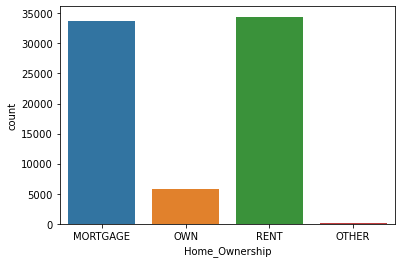

In [15]:
sns.countplot(df['Home_Ownership'])

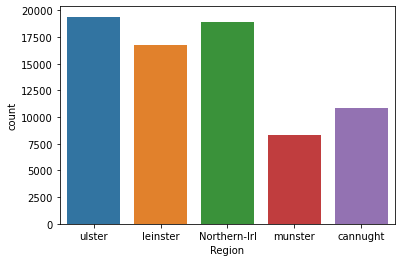

In [54]:
sns.countplot(df['Region'])

We can say data is imbalanced - hence we need to balance dataset for better accuracy. 

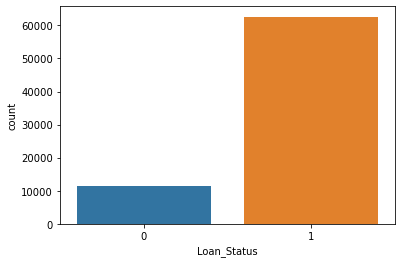

In [55]:
sns.countplot(df['Loan_Status'])

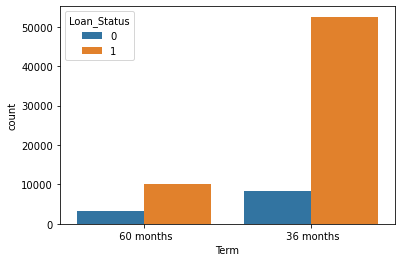

In [16]:
sns.countplot(x='Term', hue='Loan_Status', data=df)

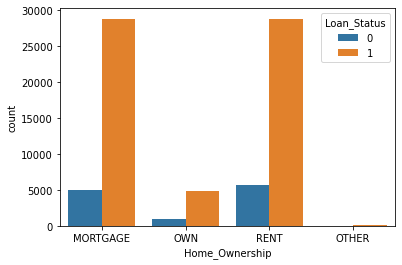

In [17]:
sns.countplot(x='Home_Ownership', hue='Loan_Status', data=df)

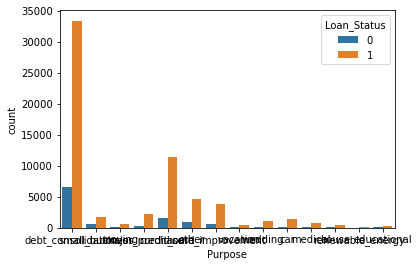

In [58]:
sns.countplot(x='Purpose', hue='Loan_Status', data=df)

EDA based on Visualization of Numerical Attributes. 

Histograms
Numerical variables with histograms,
Categorical variables with count plots,
Relationships between numerical variables with scatter plots, joint plots, and pair plots, and
Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots

In [ ]:
#import matplotlib.pyplot as plt
#bin_limit= [0,5000,10000, 15000, 20000,25000, 30000,35000, 40000]
#plt.hist(df['Loan_Amount'], bins=bin_limit)

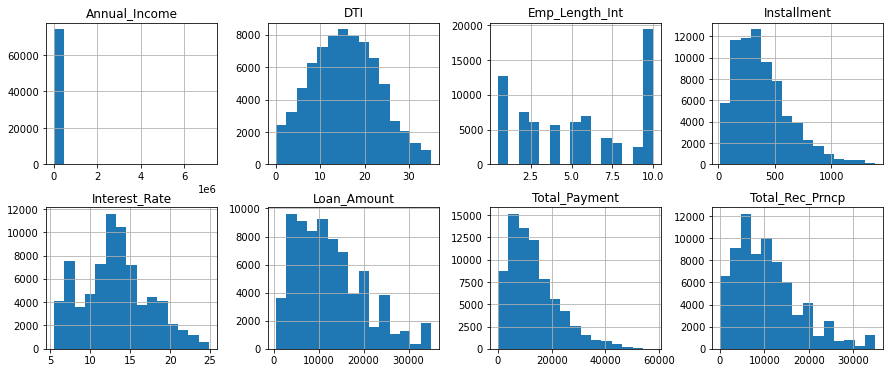

In [18]:
numerical = ['Emp_Length_Int', 'Annual_Income', 'Loan_Amount', 'Interest_Rate', 'DTI', 'Total_Payment', 'Installment', 'Total_Rec_Prncp']
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

In [16]:
df.head()

,id,Issue_Date,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment,Region
0,643218,01-12-2010,7.0,MORTGAGE,45000,20000.0,60 months,debt_consolidation,Low,1,9.99,13.36,24421.720000,20000.00,424.85,ulster
1,642872,01-12-2010,0.5,OWN,145000,7475.0,60 months,debt_consolidation,High,1,13.72,17.39,10370.742730,7475.00,172.85,leinster
2,642861,01-12-2010,0.5,MORTGAGE,120000,5575.0,36 months,small_business,High,1,15.20,16.40,6819.090000,5574.99,193.81,Northern-Irl
3,642859,01-12-2010,0.5,RENT,120000,2150.0,60 months,debt_consolidation,High,1,14.83,6.16,2816.830000,2150.00,50.96,Northern-Irl
4,642857,01-12-2010,0.5,MORTGAGE,140000,7050.0,60 months,moving,Low,1,12.98,4.26,9619.300001,7050.00,160.34,ulster


Correlation Matrix

[Text(68.09375, 0.5, 'Bank Loan Attribute\t'),
 Text(0.5, 68.09375, 'Bank Loan Attributes'),
 Text(0.5, 1.0, 'Correlation matrix of Default Bank Loan\n')]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


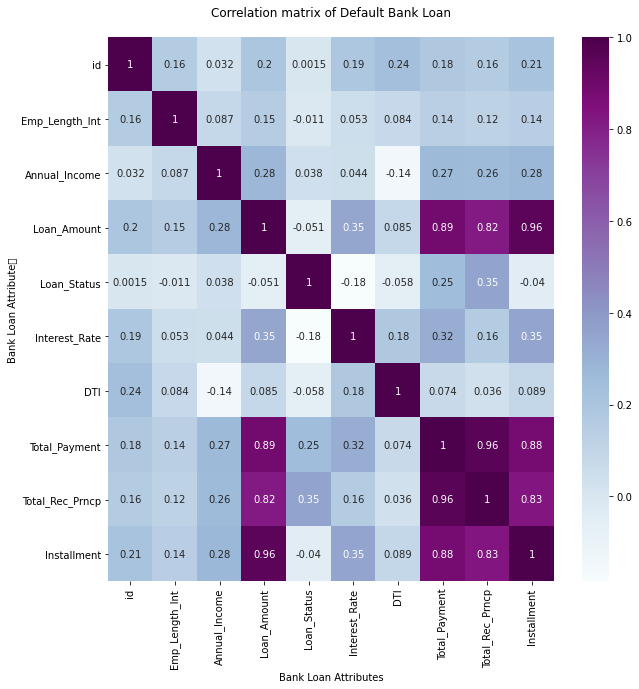

In [19]:
corr = df.corr()
plt.figure(figsize=(10,10))
cm= sns.heatmap(corr, annot=True, cmap="BuPu")
cm.set(xlabel='Bank Loan Attributes', ylabel='Bank Loan Attribute\t', title = "Correlation matrix of Default Bank Loan\n")

Drop Unnecessary and highly correlated columns!

In [16]:
df = df.drop(columns=["Total_Rec_Prncp", "Installment", "id", "Issue_Date"], axis=1)   
df.head()

,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Region
0,7.0,MORTGAGE,45000,20000.0,60 months,debt_consolidation,Low,1,9.99,13.36,24421.720000,ulster
1,0.5,OWN,145000,7475.0,60 months,debt_consolidation,High,1,13.72,17.39,10370.742730,leinster
2,0.5,MORTGAGE,120000,5575.0,36 months,small_business,High,1,15.20,16.40,6819.090000,Northern-Irl
3,0.5,RENT,120000,2150.0,60 months,debt_consolidation,High,1,14.83,6.16,2816.830000,Northern-Irl
4,0.5,MORTGAGE,140000,7050.0,60 months,moving,Low,1,12.98,4.26,9619.300001,ulster


In [21]:
df.shape

(74181, 12)

Label Encoding is to change categorical into numerical value, is coded as follow:

In [17]:
#converting categorical into Numerical
df.replace({"Home_Ownership":{'MORTGAGE':1,'OWN':2, 'RENT':3, 'OTHER':4}},inplace= True)
df.replace({"Interest_Payments":{'Low':0,'High':2}},inplace= True)
df.replace({"Region":{'cannught':0,'leinster':1, 'munster':2, 'Northern-Irl':4, 'ulster':5}},inplace= True)
df.head()

,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Region
0,7.0,1,45000,20000.0,60 months,debt_consolidation,0,1,9.99,13.36,24421.720000,5
1,0.5,2,145000,7475.0,60 months,debt_consolidation,2,1,13.72,17.39,10370.742730,1
2,0.5,1,120000,5575.0,36 months,small_business,2,1,15.20,16.40,6819.090000,4
3,0.5,3,120000,2150.0,60 months,debt_consolidation,2,1,14.83,6.16,2816.830000,4
4,0.5,1,140000,7050.0,60 months,moving,0,1,12.98,4.26,9619.300001,5


[Text(158.09375, 0.5, 'Bank Loan Attribute\t'),
 Text(0.5, 68.09375, 'Bank Loan Attributes'),
 Text(0.5, 1.0, 'Correlation matrix of Default Bank Loan\n')]

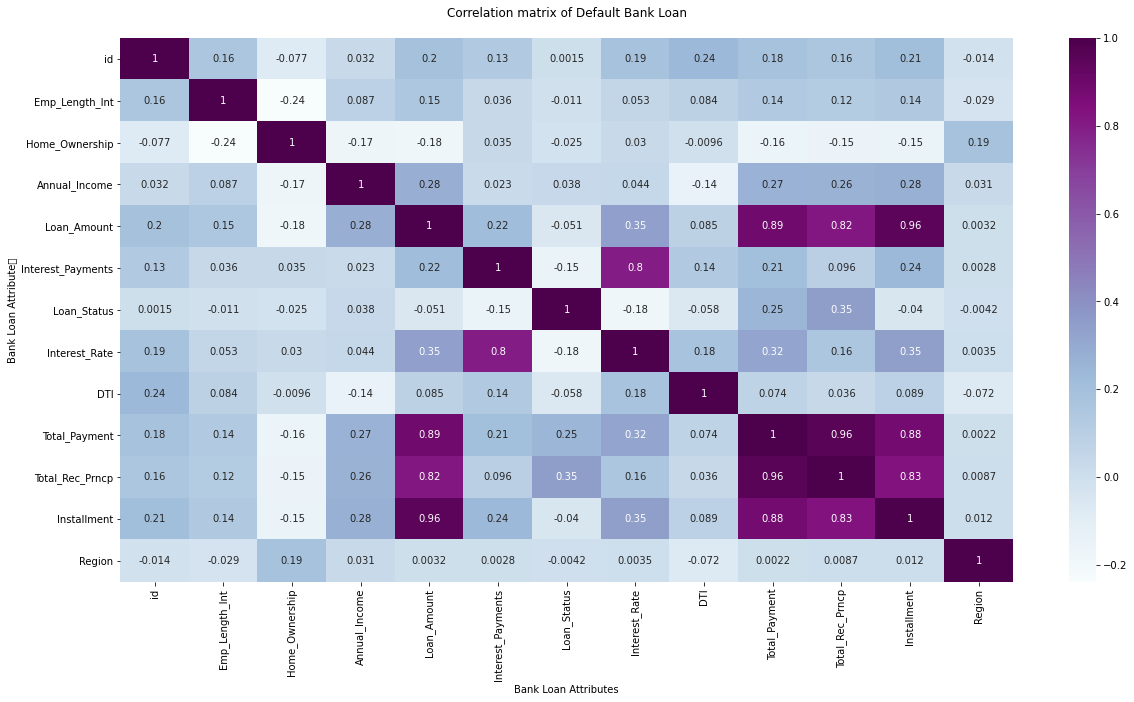

In [32]:
corr = df.corr()
plt.figure(figsize=(20,10))
cm= sns.heatmap(corr, annot=True, cmap="BuPu")
cm.set(xlabel='Bank Loan Attributes', ylabel='Bank Loan Attribute\t', title = "Correlation matrix of Default Bank Loan\n")

In [23]:
#Emp length is float and home ownership( we already replaced with numerical value), purpose, and term are nominal values
nominal_columns= ["Term", "Purpose"]
dummy_df = pd.get_dummies(df[nominal_columns])
df= pd.concat([df, dummy_df], axis=1)
df= df.drop(nominal_columns, axis=1)
df.head()


,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Region,...,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,7.0,1,45000,20000.0,0,1,9.99,13.36,24421.720000,5,...,0,0,0,0,0,0,0,0,0,0
1,0.5,2,145000,7475.0,2,1,13.72,17.39,10370.742730,1,...,0,0,0,0,0,0,0,0,0,0
2,0.5,1,120000,5575.0,2,1,15.20,16.40,6819.090000,4,...,0,0,0,0,0,0,0,1,0,0
3,0.5,3,120000,2150.0,2,1,14.83,6.16,2816.830000,4,...,0,0,0,0,0,0,0,0,0,0
4,0.5,1,140000,7050.0,0,1,12.98,4.26,9619.300001,5,...,0,0,0,0,1,0,0,0,0,0


In [24]:
#Separating Data and Label
X=df.drop(columns=['Loan_Status'], axis=1)
Y=df['Loan_Status']

print(X)
print(Y)

       Emp_Length_Int  Home_Ownership  Annual_Income  Loan_Amount  \
0                7.00               1          45000      20000.0   
1                0.50               2         145000       7475.0   
2                0.50               1         120000       5575.0   
3                0.50               3         120000       2150.0   
4                0.50               1         140000       7050.0   
...               ...             ...            ...          ...   
74176            7.00               3          60000      20500.0   
74177            3.00               3          57600      15000.0   
74178            3.00               1         160000      35000.0   
74179            6.05               1          35000      12000.0   
74180            7.00               3          50000      12000.0   

       Interest_Payments  Interest_Rate    DTI  Total_Payment  Region  \
0                      0           9.99  13.36   24421.720000       5   
1                      2 

In [25]:
#Split Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=20)

print(X.shape, X_train.shape, X_test.shape)
print(Y_train.shape)

(74181, 25) (59344, 25) (14837, 25)
(59344,)


In [ ]:
#Training the model- Support Vector Machine
#from sklearn import svm
#classifier = svm.SVC(kernel='linear')
#classifier.fit(X_train,Y_train)

In [ ]:
#Train Model
#classifier.fit(X_train,Y_train)

Model Training

In [26]:
#classify function
def classify (model, X, Y):
    X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
    model.fit(X_train, Y_train)
    print("Accuracy is", model.score(X_test, Y_test)*100)


In [27]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model,X,Y)

Accuracy is 94.4260969198625


C:\Users\sharlin.kahlon\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model,X,Y)

Accuracy is 94.70917301341242


Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify(model,X,Y)

Accuracy is 95.63254027094426


Support Vector Machine

In [32]:
from sklearn import svm
from sklearn.svm import SVC
model= svm.SVC()
classify(model,X,Y)

Accuracy is 93.72514659297701


In [64]:
#X_train_Prediction = classifier.predict(X_train)
#training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
#print('Accuracy:', training_data_accuracy)

Confusion Matrix

In [30]:
model= RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [31]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm= confusion_matrix(Y_test, y_pred)
cm

array([[ 1637,   680],
       [   49, 12471]], dtype=int64)

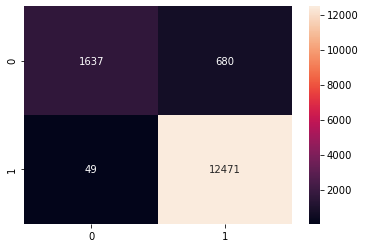

In [32]:
sns.heatmap(cm, annot= True, fmt= 'd')